# Logging

In [1]:
#import required libraries
import pandas as pd
import logging
import joblib
import matplotlib.pyplot as plt

In [2]:
logging.basicConfig(level=logging.DEBUG)

In [3]:
df = pd.read_csv("crop.csv")

In [4]:
shape = df.shape
logging.debug(f"Checks Number of Rows and Columns:\n{shape}")

DEBUG:root:Checks Number of Rows and Columns:
(2200, 8)


In [5]:
dup = df.duplicated().sum()
logging.debug(f"Checkking Duplicated Rows: {dup}")

DEBUG:root:Checkking Duplicated Rows: 0


In [6]:
nu = df.isnull().sum()
logging.debug(f"Checkking Duplicated Rows: {nu}")

DEBUG:root:Checkking Duplicated Rows: nitrogen       0
phosphorus     0
potasium       0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
inf = df.info()
logging.debug(f"Checkking Information About Our Dataset: {inf}")

DEBUG:root:Checkking Information About Our Dataset: None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potasium     2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
logging.debug("Label Encoder")

from sklearn.preprocessing import LabelEncoder
var_mod = ['label']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

DEBUG:root:Label Encoder


In [9]:
logging.debug("Input and Output Split")

inputs = df.drop(labels='label', axis=1)
output = df.loc[:,'label']

DEBUG:root:Input and Output Split


In [10]:
logging.debug("Train Test Split")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=1, stratify=output)
print("Number of Training Dataset: ", len(X_train))
print("Number of Testing Dataset: ", len(X_test))
print("Total Number of Dataset: ", len(X_train)+len(X_test))

DEBUG:root:Train Test Split


Number of Training Dataset:  1540
Number of Testing Dataset:  660
Total Number of Dataset:  2200


In [11]:
logging.debug("Algorithm Implementation")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

DEBUG:root:Algorithm Implementation


In [12]:
logging.debug("Model Creation")

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predicted_rfc = rfc.predict(X_test)

DEBUG:root:Model Creation


In [13]:
logging.debug("Accuracy Check")

accuracy = accuracy_score(y_test,predicted_rfc)
print('Accuracy of Random Forest Classifier is: ',accuracy*100)

DEBUG:root:Accuracy Check


Accuracy of Random Forest Classifier is:  99.39393939393939


In [14]:
logging.debug("Classification Report")

cr = classification_report(y_test,predicted_rfc)
print('Classification report\n---------------------\n',cr)

DEBUG:root:Classification Report


Classification report
---------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       1.00      0.90      0.95        30
           9       1.00      1.00      1.00        30
          10       0.97      1.00      0.98        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00   

In [15]:
logging.debug("Confusion Matrix")

cm = confusion_matrix(y_test,predicted_rfc)
print('Confusion matrix\n----------------\n',cm)

DEBUG:root:Confusion Matrix


Confusion matrix
----------------
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 29  0  0  0  0  0  0  0  0]

DEBUG:root:Prediction Graph
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\syedm\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\syedm\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\User

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\syedm\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\syedm\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\syedm\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\syedm\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STI

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGENG.TTF', name='Niagara Engraved', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BERNHC.TTF', name='Bernard MT Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRADM.TTF', name='Franklin Gothic Demi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\palai.ttf', name='Palatino Linotype', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ITCEDSCR.TTF', name='Edwardian Script ITC', style='normal', va

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\INFROMAN.TTF', name='Informal Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUAB.TTF', name='Book Antiqua', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyi.ttf', name='Microsoft Yi Baiti', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCB____.TTF', name='Tw Cen MT Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanai.ttf', name='Verdana', style='italic', variant='normal', w

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GILLUBCD.TTF', name='Gill Sans Ultra Bold Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuil.ttf', name='Segoe UI', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CBI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FELIXTI.TTF', name='Felix Titling', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanab.ttf', name='Verdana', style='normal', variant='normal'

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRLNSB.TTF', name='Berlin Sans FB', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOOKOSI.TTF', name='Bookman Old Style', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisli.ttf', name='Segoe UI', style='italic', variant='normal', weight=350, stretch='normal', size='scalable')) = 11.0975
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BELL.TTF', name='Bell MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeprb.ttf', name='Segoe Print', style='normal', variant='normal', weight=700, stret

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LBRITEI.TTF', name='Lucida Bright', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LEELAWAD.TTF', name='Leelawadee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FREESCPT.TTF', name='Freestyle Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisbi.ttf', name='Segoe UI', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAXI.TTF', name='Lucida Fax', style='italic', variant='normal', weight=400, stretc

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candara.ttf', name='Candara', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolab.ttf', name='Consolas', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ebrimabd.ttf', name='Ebrima', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbd.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cour.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIST.TTF', name='Calisto MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LeelUIsl.ttf', name='Leelawadee UI', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRLNSDB.TTF', name='Berlin Sans FB Demi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GLECB.TTF', name='Gloucester MT Extra Condensed', style='normal', variant='norma

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.6863636363636365
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SitkaVF.ttf', name='Sitka', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_I.TTF', name='Bodoni MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SegUIVar.ttf', name='Segoe UI Variable', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COPRGTB.TTF', name='Copperplate Gothic Bold', style='normal', variant='normal', wei

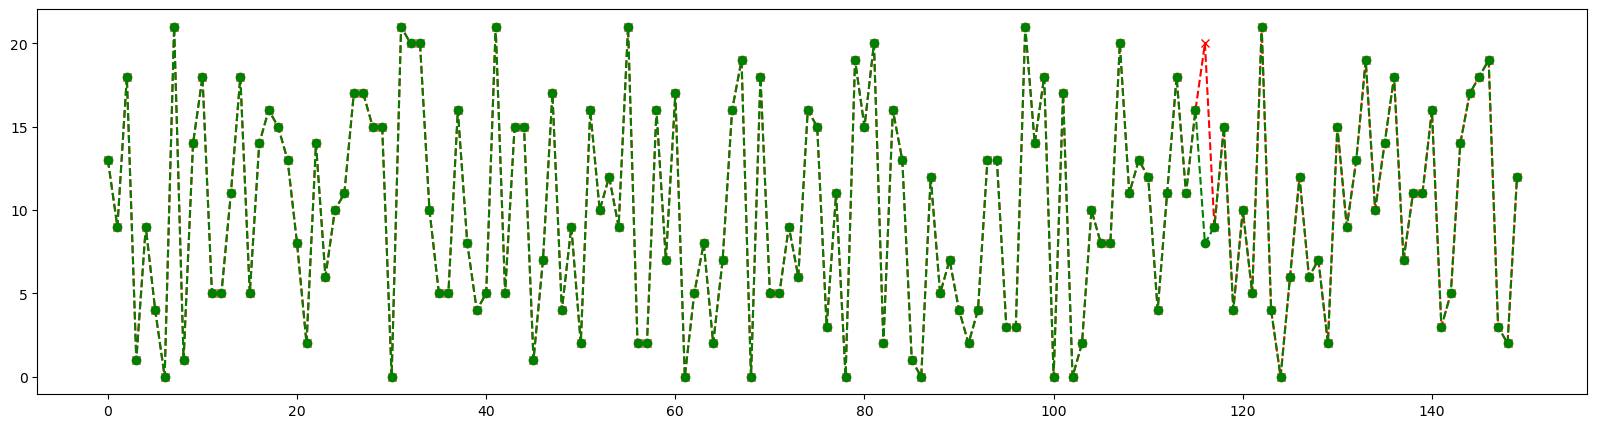

In [16]:
logging.debug("Prediction Graph")

DF = pd.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_rfc
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:150], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:150],  marker='o', linestyle='dashed', color='green')
plt.show()

In [17]:
logging.debug("Model Saving")

import joblib
joblib.dump(rfc,'rfc.pkl')

DEBUG:root:Model Saving


['rfc.pkl']